<a href="https://colab.research.google.com/github/ReefAmarin/HTU-DS-2021/blob/main/Reef_Amarin_Regular_Expression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1.  what is regular expressions
2.   Module **re**
3.   Funtions in regular expressions



#### A **regular expression** is a special sequence of characters that helps you **match or find other strings or sets of strings**, using a specialized syntax held in a pattern.Regular expressions (regex) are essentially text patterns that you can use to **automate searching** through and replacing elements within strings of text. This can make **cleaning and working** with text-based data sets much easier, saving you the trouble of having to search through mountains of text by hand.

Below is detailed list of expressions and what they match to. 

| Expression | Matches With                   |
| ---------- | -----------------------------  |
| `abc...`   | lowercase letter               |
| `123…`     | Digits                         |
| `\d`       | Any Digit                      |
| `'\D'`     | Any Non-digit character        |
| `.`        | Any Character                  |
| `\.`       | Period                         |
| `[abc]`    | Only a, b, or c                |
| `\.`       | Period                         |
| `[abc]`    | Only a, b, or c                |
| `[^abc]`   | Not a, b, nor c                |
| `[a-z]`    | Characters a to z              |
| `[0-9]`    | Numbers 0 to 9                 |
| `\w`       | Any Alphanumeric character     |
| `\W`       | Any Non-alphanumeric character |
| `{m}`      | m Repetitions                  |
| `{m,n}`    | m to n Repetitions             |
| `\*`       | Zero or more repetitions       |
| `\+`       | One or more repetitions        |
| `?`        | Optional character             |
| `\s`       | Any Whitespace                 |
| `\S`       | Any Non-whitespace character   |
| `^…$`      | Starts and ends                |
| `(…)`      | Capture Group                  |


In [22]:
import pandas as pd
import re
import numpy as np
df_1=pd.read_csv('/content/world-happiness-report-2019.csv')
df_1.head(3)

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0


### A more sophisticated example Why Regex is powerful?

But, you might ask, why would you want to use the more complicated and verbose syntax of regular expressions rather than the more intuitive and simple string methods?
The advantage is that regular expressions offer *far* more flexibility.

Here we'll consider a more complicated example: the common task of matching email addresses.
I'll start by simply writing a (somewhat indecipherable) regular expression, and then walk through what is going on.
Here it goes:

The following table lists a few of these characters that are commonly useful:

| Character | Description                 || Character | Description                     |
|-----------|-----------------------------||-----------|---------------------------------|
| ``"\d"``  | Match any digit             || ``"\D"``  | Match any non-digit             |
| ``"\s"``  | Match any whitespace        || ``"\S"``  | Match any non-whitespace        |
| ``"\w"``  | Match any alphanumeric char || ``"\W"``  | Match any non-alphanumeric char |


##Be attention to Uppercases

In [25]:
df_1[df_1['Country (region)'].str.count('^[pP].*')>0] #(1)
#What the difference between (1) and (2)
df_1[df_1['Country (region)'].str.count('[pP].*')>0] #(2)

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
19,Czech Republic,20,20,74.0,22.0,24.0,58.0,121.0,117.0,32.0,31.0
29,Spain,30,21,107.0,107.0,26.0,95.0,78.0,50.0,30.0,3.0
30,Panama,31,121,7.0,48.0,41.0,32.0,104.0,88.0,51.0,33.0
33,Singapore,34,5,38.0,2.0,36.0,20.0,1.0,21.0,3.0,1.0
39,Poland,40,28,76.0,33.0,44.0,52.0,108.0,77.0,41.0,36.0
48,Cyprus,49,95,60.0,99.0,90.0,81.0,115.0,39.0,33.0,6.0
57,Japan,58,43,73.0,14.0,50.0,64.0,39.0,92.0,24.0,2.0
62,Paraguay,63,90,1.0,39.0,30.0,34.0,76.0,67.0,90.0,81.0
63,Northern Cyprus,64,35,144.0,90.0,81.0,77.0,29.0,43.0,NaN,NaN
64,Peru,65,114,36.0,127.0,77.0,61.0,132.0,126.0,76.0,47.0


###Extract the first 5 characters of each country using ^(start of the String) and {5} (for 5 characters) and create a new column first_five_letter

In [29]:
import numpy as np
df_1['first_five_Letter']=df_1['Country (region)'].str.extract(r'(^\w{5})') #(1)
#What the difference between (1) and (2)
df_1['first_five_Letter']=df_1['Country (region)'].str.extract(r'(^\w{5,6})') #(2)
df_1.head() 

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy,first_five_Letter
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0,Finlan
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0,Denmar
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0,Norway
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0,Icelan
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0,Nether


 # **Pandas Replace**

In [32]:
# Remove the dash(-) followed by number from all countries in the Series
S=pd.Series(['Finland-1','Colombia-2','Florida-3','Japan-4','Puerto Rico-5','Russia-6','france-7'])
S.replace(r'[\d -]','',regex=True, inplace = True) # (1) # inplace =True replace on same string
#What the difference between (1) and (2)
S.replace(r'\d -','',regex=True, inplace = True) #(2)
S

0        Finland-1
1       Colombia-2
2        Florida-3
3          Japan-4
4    Puerto Rico-5
5         Russia-6
6         france-7
dtype: object

 # **Pandas Contains**


In [34]:
S=pd.Series(['Finland','Colombia','Florida','Japan','Puerto Rico','Russia','france'])
S.str.contains('^[Ff.*]') #(1) #we use [] when we want to match more than one character
#What the difference between (1) and (2)
S.str.contains('^[Ff.*]') #(2)

0     True
1    False
2     True
3    False
4    False
5    False
6     True
dtype: bool

 # **Pandas Match**

In [73]:
S=pd.Series(['Finland','Colombia','Florida','Japan','Puerto Rico','Russia','france'])
S[S.str.match(r'(^P.*)')==True] # retrieve the index of item and Item's value

4    Puerto Rico
dtype: object

 # **Pandas Split**

In [37]:
s = pd.Series(["StatueofLiberty built-on 28-Oct-1886"])

s.str.split(r"[St.*]", n=-1,expand=True)  # (1)
#What the difference between (1) and (2)
s.str.split(r"[St.*]", n=-1,expand=False) # (2)
#n-->limit no of splits in output -1 default all
#expand=True return DataFrame/MultiIndex expanding dimensionality.
#expand=False  return Series/Index, containing lists of strings.
#When using expand=True, the split elements will expand out into separate columns. If NaN is present, it is propagated throughout the columns during the split.

0    [, , a, ueofLiber, y buil, -on 28-Oc, -1886]
dtype: object

In [38]:
#    . ^ $ * + ? { } [ ] \ | ( )

regex = re.compile(r'\$') #compile a regex returns a compiled regular exp obj
regex

re.compile(r'\$', re.UNICODE)

###First we are counting the countries starting with character ‘F’.

In [63]:
CountF=0
i=0
for i in df_1['Country (region)'].values:
  if re.match(r'(^F.*)',i):
    CountF = CountF + 1
  
    print(f'Item Matched:  ' + i)
next
print(f'Count of these items:' + str(CountF))

Item Matched:  Finland
Item Matched:  France
Count of these items:2


In [86]:
regex.findall("the cost is $20 which is 20% of the cost in $") #(1) #find all the ocurrances
#What the difference between (1) and (2)
regex.search("the cost is $20 which is 20% of the cost in$") #(2) # the first match index of it
#re.search(pattern, string, flags=0)

<re.Match object; span=(12, 13), match='$'>

In [46]:
regex2 = re.compile(r'[\d \s \W]') #we use r to consider \ instead to have \t tab \n new line
regex2.findall('the fox is 9 years old @') #Match any digit \d  
#Match any whitespace \s  
#non-alphanumeric char  \W

[' ', ' ', ' ', '9', ' ', ' ', ' ', '@']

In [49]:
regex2 = re.compile('[a-z]\d\d') #(1)
#What the difference between (1) and (2)
regex2 = re.compile('[a-z]\d\d.*')
regex2.findall('10438a79888,.. ---- U G2, H6')#(2)

['a79888,.. ---- U G2, H6']

In [85]:
 #Sub used to replace occurrences of a particular sub-string with another sub-string.
 #In a python 'R' or 'r' before a string mean that the string a raw string. When a 'R' or 'r'
 #is present before a string, a character following a backslash included in the string without any change.
#why we use 'r'
# example 1
import re
print (f'1 -' + re.sub('\s+', ' ', 'hello     there      there')) #replace \s with single white space
print (f'2 -'+ re.sub(r'\\w+', 'reef ', 'hell\wo     there      there'))
# prints 'hello there there' - not expected as r prefix is not used
# example 2
import re
print (f'3 -'+ re.sub('(\b\w+)(\s+\1\b)+', r'\1', 'hello     there      there'))
print (f'4 -'+ re.sub(r'(\b\w+)(\s+\1\b)+', '\1', 'hello     there      there'))
# prints 'hello     there' - as expected as r prefix is used

# example 3
import re
print (f'5 -'+ re.sub('(\b\w+)(\s+\1\b)+', '\1', 'hello     there      there'))
print (f'6 -'+ re.sub(r'(\b\w+)(\s+\1\b)+', r'\1', 'hello     there      there'))
# prints 'hello     there      there' - as expected as r prefix is not used

print (re.sub(r'(\b\w+)(\s+\1\b)+', r'\1', 'hello     there      there'))
#is

print (re.sub('(\\b\\w+)(\\s+\\1\\b)+', '\\1', 'hello     there      there'))


1 -hello there there
2 -hellreef o     there      there
3 -hello     there      there
4 -hello     
5 -hello     there      there
6 -hello     there
hello     there
hello     there


In [88]:
import re

line = "Cats are smarter #than dogs"
matchObj = re.match( r'(.*) are (.*?).*',line, re.M|re.I|re.VERBOSE)
# are (.*?) .*', line, re.M|re.I)
#.* will match any character (including newlines if dotall is used).
#(.*) will add that to a capture group.
#(.*?) the ? makes the .* non-greedy, matching as little as it can to make a match, 
#and the parenthesis makes it a capture group as well.

if matchObj:
   print("matchObj.group() : ", matchObj.group()) # return all the object
   print("matchObj.group(1) : ", matchObj.group(1)) #return first match
   print("matchObj.group(2) : ", matchObj.group(2)) #return second match
  
else:
   print ("No match!!")

matchObj.group() :  Cats are smarter #than dogs
matchObj.group(1) :  Cats 
matchObj.group(2) :  


In [170]:
import re
email4 = re.compile(r'(?P<user>[\w.]+)@(?P<domain>\w+)\.(?P<suffix>[a-z]{3})') # ?P<user> Labels
match = email4.match('guido@python.org')
match.groupdict()

{'domain': 'python', 'suffix': 'org', 'user': 'guido'}

In [169]:
#Match E-mail address
import re
 
# Make a regular expression
# for validating an Email
regex = r'([\w.]+)@(\w+)\.([a-z]{3})'
 
if(re.match(regex, 'reef.amarin@htu.edu.jo')):
 print("Valid Email")
 
else:
 print("Invalid Email")
 

Invalid Email


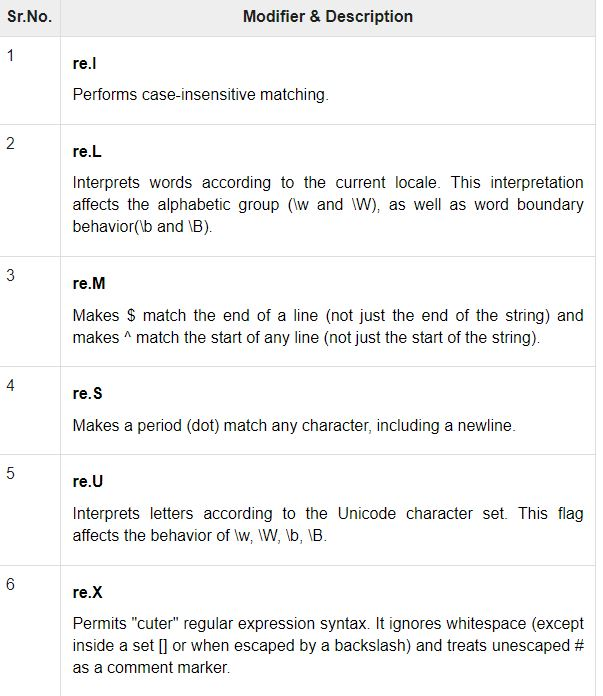

In [112]:
df_1[df_1['Country (region)'].str.contains('^[Ii.*]')==True]

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy,first_five_Letter
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0,Icela
12,Israel,13,14,104.0,69.0,38.0,93.0,74.0,24.0,31.0,11.0,Israe
15,Ireland,16,34,33.0,32.0,6.0,33.0,10.0,9.0,6.0,20.0,Irela
35,Italy,36,31,99.0,123.0,23.0,132.0,128.0,48.0,29.0,7.0,Italy
91,Indonesia,92,108,9.0,104.0,94.0,48.0,129.0,2.0,83.0,98.0,Indon
98,Ivory Coast,99,134,88.0,130.0,137.0,100.0,62.0,114.0,118.0,147.0,Ivory
116,Iran,117,109,109.0,150.0,134.0,117.0,44.0,28.0,54.0,77.0,NaN
125,Iraq,126,147,151.0,154.0,124.0,130.0,66.0,73.0,64.0,107.0,NaN
139,India,140,41,93.0,115.0,142.0,41.0,73.0,65.0,103.0,105.0,India


#Jordan Mobile Number

In [197]:
#Match Mobile Number
import re
 
# Make a regular expression
# for validating an Mobile Number
MobileNumber = r'(^009627)[7-9]{1}[0-9]{7}$'
if(re.match(MobileNumber, '00962787493702')):
 print("Valid Mobile Number")
 
else:
 print("Invalid Mobile Number")
 

Valid Mobile Number


-----------------
<p><img alt="Colaboratory logo" height="30px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

**Hands-on - 10m:**

Write a function to check if password is valid considering the following:

* Should have at least 8 values.
* Should have at least one uppercase and one lowercase character.








In [ ]:
def is_password_strong():
   # Your code is here

# One way to solve it 
import re
def is_password_strong():
    password = input('Enter a password to test: ')

    length_regex = re.compile(r'.{8,}')
    uppercase_regex = re.compile(r'[A-Z]')
    lowercase_regex = re.compile(r'[a-z]')
    digit_regex = re.compile(r'[0-9]')

    return (length_regex.search(password) is not None
            and uppercase_regex.search(password) is not None
            and lowercase_regex.search(password) is not None
            and digit_regex.search(password) is not None)